<a href="https://colab.research.google.com/github/chindimaga/SHALA2020/blob/master/Assignment_ML_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
titanic_data = pd.read_csv('/content/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
print('The percentage of data missing in a column',titanic_data.isna().sum()/titanic_data.shape[0]*100)

The percentage of data missing in a column PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


77% > 50% 
so it is preffered to drop the cabin column
Lets make another column which has the info if the particular row of the column Cabin had the data or not

In [0]:
titanic_data['Cabin_bool'] = titanic_data.Cabin.isna().astype(int)

In [0]:
titanic_data = titanic_data.drop(columns=['Cabin'])

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Cabin_bool   891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [10]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_bool
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.771044
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [11]:
titanic_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Only 2 values are missing

In [12]:
titanic_data[titanic_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_bool
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,0


In [0]:
df_s1=titanic_data[titanic_data.Survived==1]
df_s0=titanic_data[titanic_data.Survived==0]

In [14]:
df_s1.Embarked.value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

Its safe to impute both the missing embarked values as s ie,the mode

In [0]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].value_counts().index[0], inplace=True)

In [16]:
print(df_s0.Age.median(),df_s1.Age.median())

28.0 28.0


Median age is same for both the classof output so we can impute the median. Let us also make a bool column of age whose data is missing. 

In [0]:
titanic_data['Age_bool'] = titanic_data.Age.isna().astype(int)

In [0]:
def onehotter(colname,X):
  cat = pd.get_dummies(X[colname], prefix=colname)
  X = pd.concat([X, cat], axis=1)
  X = X.drop(columns=[colname])
  return X 

In [0]:
titanic_data = onehotter("Embarked",titanic_data)

In [0]:
impute = SimpleImputer(missing_values=np.nan,strategy="median")

In [0]:
titanic_data["Age"] = impute.fit_transform(titanic_data[["Age"]])

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_bool,Age_bool,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,0,0,0,1


In [0]:
def labeler(colname,X):
  bot = preprocessing.LabelEncoder()
  bot.fit(X[colname])
  X[colname+"_tra"] = bot.transform(X[colname])
  X = X.drop(columns=[colname])
  return bot,X

In [0]:
label_sex, titanic_data = labeler("Sex", titanic_data)

In [25]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin_bool   891 non-null    int64  
 10  Age_bool     891 non-null    int64  
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
 14  Sex_tra      891 non-null    int64  
dtypes: float64(2), int64(8), object(2), uint8(3)
memory usage: 86.3+ KB


In [26]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin_bool', 'Age_bool', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_tra'],
      dtype='object')

In [0]:
titanic_data.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [28]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_bool,Age_bool,Embarked_C,Embarked_Q,Embarked_S,Sex_tra
0,0,3,22.0,1,0,7.2500,1,0,0,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,0
3,1,1,35.0,1,0,53.1000,0,0,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,0,0,1,1


In [29]:
titanic_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
X = titanic_data.drop(['Survived'], axis = 1)
y = titanic_data['Survived']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
print(X_train.shape)

(712, 11)


In [0]:
x = X_train.iloc[:, :].values 
x_t = X_test.iloc[:, :].values 
Standardisation = preprocessing.StandardScaler() 
Standardisation.fit(x)
xstd = Standardisation.transform(x)
xstd_test = Standardisation.transform(x_t)

# Ensemble Learning

In [0]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
# Import models, including VotingClassifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_curve,confusion_matrix
# Set seed for reproducibility
SEED = 1

In [0]:
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
rfc = RandomForestClassifier(random_state=SEED)
xgb = XGBClassifier(random_state=SEED)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt),
('XGBoost', xgb),
('Random forest', rfc)]

In [45]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
  #fit clf to the training set
  clf.fit(xstd, y_train)
  # Predict the labels of the test set
  y_pred = clf.predict(xstd_test)
  # Evaluate the accuracy of clf on the test set
  print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.816
K Nearest Neighbours : 0.821
Classification Tree : 0.760
XGBoost : 0.793
Random forest : 0.799


In [46]:
# Instantiate a VotingClassifier 'vc'
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(xstd, y_train)
y_pred = vc.predict(xstd_test)
# Evaluate the test-set accuracy of 'vc'
print("Voting classifier: ", round(accuracy_score(y_test, y_pred),3))

Voting classifier:  0.821


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
def report(name,clf,X_t,y_test):
  predictions = clf.predict(X_t)
  # Predict the test set probabilities of positive class
  y_pred_proba = clf.predict_proba(X_t)[:,1]
  # Evaluate test-set roc_auc_score
  clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
  # Print adb_clf_roc_auc_score
  print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, predictions))
  fper, tper, thresholds = roc_curve(y_test, y_pred_proba) 
  plt.plot(fper, tper)
  plt.plot([0,1], [0,1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(name+' ROC curve')
  # show the plot
  plt.show()

In [40]:
lr = LogisticRegression(random_state=SEED)
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(lr, hyperparameters, cv=kfold, verbose=0, n_jobs = -1)
best_lr = clf.fit(X_train, y_train)
print('Best Penalty:', best_lr.best_estimator_.get_params()['penalty'])
print('Best C:', best_lr.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


ROC AUC score: 0.79
Confusion Matrix:
[[97 13]
 [21 48]]


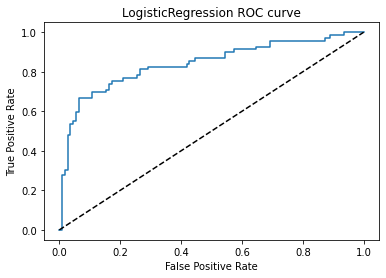

In [78]:
report('LogisticRegression',best_lr,xstd_test,y_test)

In [41]:
knn = KNN()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=kfold, scoring='accuracy', n_jobs = -1)
best_knn = grid.fit(X_train, y_train)
print('Best n_neighbors:', best_knn.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 3


ROC AUC score: 0.79
Confusion Matrix:
[[101   9]
 [ 22  47]]


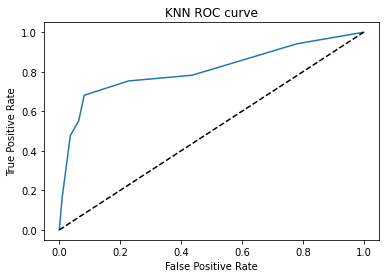

In [79]:
report('KNN',best_knn,xstd_test,y_test)

In [42]:
dt = DecisionTreeClassifier(random_state=SEED)
criterion = ['gini', 'entropy']
max_depth = list(range(2, 10))
parameters = dict(criterion=criterion,
                  max_depth=max_depth)
clf = GridSearchCV(dt, parameters,cv=kfold, scoring='accuracy', n_jobs = -1)
best_dt = clf.fit(X_train, y_train)
print('Best Criterion:', clf.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 8


ROC AUC score: 0.79
Confusion Matrix:
[[104   6]
 [ 31  38]]


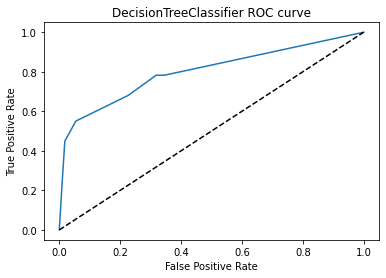

In [80]:
report('DecisionTreeClassifier',best_dt,xstd_test,y_test)

In [45]:
n_estimators =[100, 150, 200, 250] 
criterion = ['gini', 'entropy']
max_depth = list(range(2, 10,2))
min_samples_split = list(range(2, 4))
parameters = dict(n_estimators=n_estimators,
                  criterion=criterion,
                  min_samples_split=min_samples_split,
                  max_depth=max_depth)
rfc = RandomForestClassifier(random_state=SEED)
ccc = GridSearchCV(rfc, parameters,cv=kfold, n_jobs = -1, verbose = 1)
best_rfc = ccc.fit(xstd, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.2min finished


In [82]:
print('Best Criterion:', ccc.best_estimator_.get_params())
best_rfc = RandomForestClassifier(oob_score= True,n_estimators= 100,min_samples_split= 2,max_depth= 6,criterion='entropy',random_state=SEED,verbose=0)
best_rfc.fit(xstd, y_train)

Best Criterion: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

ROC AUC score: 0.79
Confusion Matrix:
[[98 12]
 [26 43]]


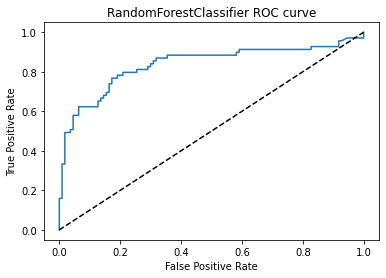

In [83]:
report('RandomForestClassifier',best_rfc,xstd_test,y_test)

In [38]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2),
 'n_estimators':[50,100,150,200]
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=kfold)
gsearch1.fit(xstd,y_train)
print(gsearch1.best_params_, gsearch1.best_score_) 

{'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50} 0.8839389849382012


In [39]:
param_test1 = {
    'n_estimators':[40,50,60],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.03, n_estimators=50, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=kfold)
best_xgb = gsearch.fit(xstd,y_train)
print(gsearch.best_params_, gsearch.best_score_) 

{'colsample_bytree': 0.8, 'gamma': 0.4, 'n_estimators': 60, 'reg_alpha': 0.005, 'subsample': 0.8} 0.8813007821158291


In [84]:
best_xgb = XGBClassifier( learning_rate =0.03, n_estimators=60, max_depth=3,
 min_child_weight=1, gamma=0.4, subsample=0.8, colsample_bytree=0.8,reg_alpha=0.005,
 objective= 'binary:logistic', scale_pos_weight=1, seed=27)
best_xgb.fit(xstd, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
              learning_rate=0.03, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=60, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

ROC AUC score: 0.79
Confusion Matrix:
[[101   9]
 [ 26  43]]


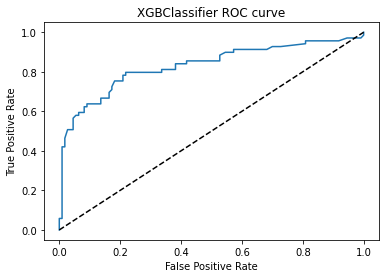

In [85]:
report('XGBClassifier',best_xgb,xstd_test,y_test)

In [0]:
best_classifiers = [('Logistic Regression', best_lr),
('K Nearest Neighbours', best_knn),
('Classification Tree', best_dt),
('XGBoost', best_xgb),
('Random forest', best_rfc)]

In [64]:
for clf_name, clf in best_classifiers:
   #fit clf to the training set 
  clf.fit(xstd, y_train)
  # Predict the labels of the test set
  y_pred = clf.predict(xstd_test)
  dtrain_predprob = clf.predict_proba(xstd)[:,1]
  # Evaluate the accuracy of clf on the test set
  print('\n{:s} Report '.format(clf_name))
  print ("Accuracy : %.4g" % accuracy_score(y_test, y_pred))
  print ("AUC Score (Train): %f" % roc_auc_score(y_train, dtrain_predprob))


Logistic Regression Report 
Accuracy : 0.8101
AUC Score (Train): 0.864602

K Nearest Neighbours Report 
Accuracy : 0.8268
AUC Score (Train): 0.912042

Classification Tree Report 
Accuracy : 0.7933
AUC Score (Train): 0.872296

XGBoost Report 
Accuracy : 0.8045
AUC Score (Train): 0.901858
Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   44.0s



Random forest Report 
Accuracy : 0.7877
AUC Score (Train): 0.935096


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.2min finished


In [65]:
best_vc = VotingClassifier(estimators=best_classifiers)
# Fit 'vc' to the traing set and predict test set labels
best_vc.fit(xstd, y_train)
y_pred = best_vc.predict(xstd_test)
# Evaluate the test-set accuracy of 'vc'
print("Voting classifier: ", round(accuracy_score(y_test, y_pred),3))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   49.2s


Voting classifier:  0.804


[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.3min finished


In [67]:
print("Voting classifier: ", round(accuracy_score(y_test, y_pred),3))

Voting classifier:  0.804


In [0]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)
# Fit 'adb_clf' to the training set
adb_clf.fit(xstd, y_train)
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(xstd_test)[:,1]
# Evaluate test-set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

In [71]:
# Print adb_clf_roc_auc_score
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.79


ROC AUC score: 0.79
Confusion Matrix:
[[89 21]
 [19 50]]


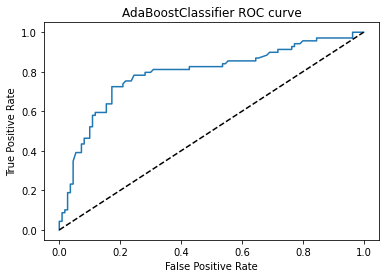

In [86]:
report('AdaBoostClassifier',adb_clf,xstd_test,y_test)